# Topic Clustering
Author: Andrew Auyeung

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read document topic matrix
doc_top_mat = pd.read_csv('../src/TDS_document_topic_matrix.csv', sep='\t', index_col=0)

In [3]:
doc_top_mat.head()

article_id        date                                               text  \
0        3406  2018-03-24  there is a theorem telling u there is no singl...   
1        5405  2019-07-02  this article is a case for keeping retaining a...   
2        5957  2019-11-26  why are competent people often so bad at teach...   
3        6932         NaN  this article wa originally posted by derrick m...   
4        8041  2019-07-20  in a previous article we discussed the concept...   

   Topic 0  Topic 1  Topic 2  Topic 3  Topic 4  Topic 5  Topic 6  ...  \
0    0.000      0.0    0.000      0.0    0.162    0.000      0.0  ...   
1    0.099      0.0    0.017      0.0    0.000    0.000      0.0  ...   
2    0.153      0.0    0.000      0.0    0.000    0.000      0.0  ...   
3    0.000      0.0    0.000      0.0    0.256    0.016      0.0  ...   
4    0.000      0.0    0.000      0.0    0.000    0.000      0.0  ...   

   Topic 10  Topic 11  Topic 12  Topic 13  Topic 14  Topic 15  Topic 16  \
0     0.000     0.000     0.191     0.000     0.629       0.0       0.0   
1     0.000     0.000     0.852     0.015     0.000       0.0       0.0   
2     0.000     0.045     0.802     0.000     0.000       0.0       0.0   
3     0.554     0.000     0.000     0.000     0.173       0.0       0.0   
4     0.000     0.000     0.065     0.000     0.935       0.0       0.0   

   Topic 17  Topic 18  Topic 19  
0     0.000       0.0     0.017  
1     0.016       0.0     0.000  
2     0.000       0.0     0.000  
3     0.000       0.0     0.000  
4     0.000       0.0     0.000  

[5 rows x 23 columns]

In [4]:
doc_top_mat.columns

Index(['article_id', 'date', 'text', 'Topic 0', 'Topic 1', 'Topic 2',
       'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8',
       'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12', 'Topic 13', 'Topic 14',
       'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19'],
      dtype='object')

In [5]:
# Load Kmeans
train = doc_top_mat[['Topic 0', 'Topic 1', 'Topic 2',
       'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8',
       'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12', 'Topic 13', 'Topic 14',
       'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19']]


In [13]:
inertias = []
for i in range(1, 30):
    km = KMeans(n_clusters=i, n_jobs=-1)
    km.fit(train)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Inertia')

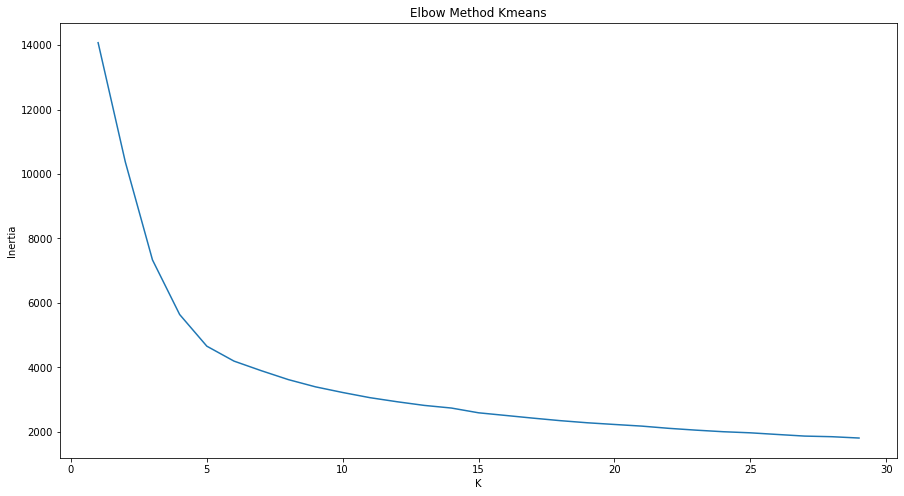

In [14]:
plt.figure(figsize=(15,8))

plt.plot(range(1,30), inertias)
plt.title('Elbow Method Kmeans')
plt.xlabel('K')
plt.ylabel('Inertia')

In [15]:
km_5 = KMeans(n_clusters=5, n_jobs=-1)
clusters = km_5.fit_transform(train)

In [16]:
cluster_labels = np.argmax(clusters, axis=1)

In [17]:
clusters

array([[0.55085333, 0.87355081, 0.21413238, 0.7801452 , 0.8458112 ],
       [0.68365215, 1.03988465, 1.09520053, 1.04943556, 0.11017203],
       [0.63187398, 1.00866444, 1.06522218, 1.01913522, 0.11815023],
       ...,
       [0.64904118, 0.73060199, 0.95664945, 0.22120138, 0.99473931],
       [0.60583234, 0.96830422, 1.02535882, 0.97608168, 0.16176981],
       [0.4917242 , 0.87469973, 0.68431585, 0.89981559, 0.36333882]])

In [18]:
len(cluster_labels)

35646

In [10]:
# Visualize clusters
from sklearn.decomposition import PCA
pca_features = PCA(2).fit_transform(train)

In [27]:
from itertools import cycle
def plot_PCA_2D(data, target, target_names=None, **kwargs):
    """
    Plots the explained variance of two principal components of a multidimensional dataset. 

    data: PCA features to plot
    target: labels for targets
    target_names: Names to assign the clusters of colors
    """
    if target_names==None:
        target_names = [f'Topic {str(i)}' for i in range(len(set(target)))]
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray', **kwargs)
    plt.legend(bbox_to_anchor=(1,1))

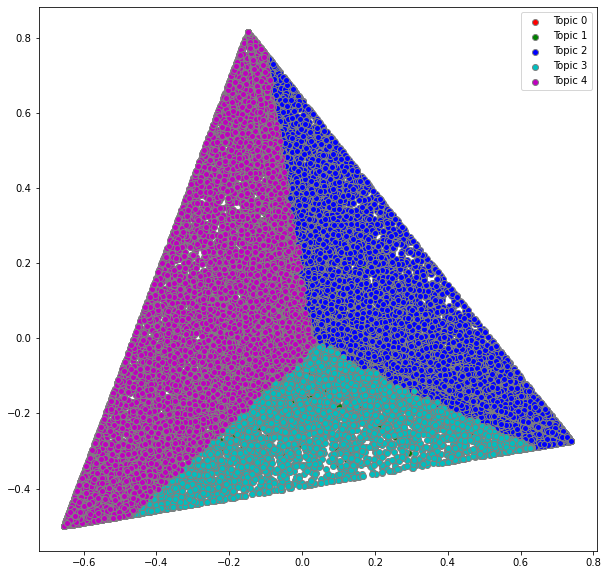

In [19]:
plot_PCA_2D(pca_features, cluster_labels, [f'Topic {str(i)}' for i in range(5)])

In [24]:
topic_labels = np.argmax(train.to_numpy(), axis=1)

In [26]:
len(set(topic_labels))

20

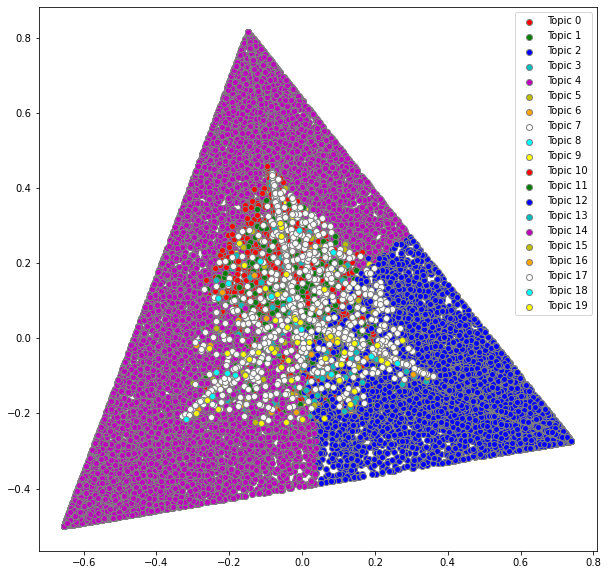

In [28]:
plot_PCA_2D(pca_features, topic_labels)

In [23]:
doc_top_mat[doc_top_mat['cluster_label']==1]

article_id        date  \
1            5405  2019-07-02   
2            5957  2019-11-26   
6            8061  2019-07-21   
7            8062  2019-07-21   
8            8063  2019-07-21   
...           ...         ...   
35634       65921  2016-04-03   
35637       65924  2015-12-14   
35638       65925  2015-12-22   
35641       65929  2015-10-06   
35644       65932  2015-08-23   

                                                    text  Topic 0  Topic 1  \
1      this article is a case for keeping retaining a...    0.099    0.000   
2      why are competent people often so bad at teach...    0.153    0.000   
6      when i first started querying google analytics...    0.000    0.000   
7      are you bored of doing same stuff againfeeling...    0.000    0.000   
8      as a budding data scientist one of the first t...    0.000    0.000   
...                                                  ...      ...      ...   
35634  this is a map of where the actual of hometown ...    0.205    0.091   
35637  coding in python just became a lot more awesom...    0.000    0.000   
35638  there is an idea that ha been circling around ...    0.000    0.000   
35641  i became familiar with geoffrey moore in while...    0.390    0.000   
35644  complex interconnected system tend to grow unt...    0.000    0.000   

       Topic 2  Topic 3  Topic 4  Topic 5  Topic 6  ...  Topic 11  Topic 12  \
1        0.017    0.000    0.000    0.000      0.0  ...     0.000     0.852   
2        0.000    0.000    0.000    0.000      0.0  ...     0.045     0.802   
6        0.306    0.000    0.342    0.143      0.0  ...     0.000     0.138   
7        0.000    0.000    0.482    0.257      0.0  ...     0.000     0.091   
8        0.000    0.000    0.477    0.000      0.0  ...     0.000     0.341   
...        ...      ...      ...      ...      ...  ...       ...       ...   
35634    0.000    0.000    0.191    0.000      0.0  ...     0.026     0.290   
35637    0.000    0.000    0.692    0.000      0.0  ...     0.000     0.307   
35638    0.000    0.000    0.000    0.158      0.0  ...     0.000     0.841   
35641    0.000    0.000    0.000    0.000      0.0  ...     0.000     0.610   
35644    0.000    0.046    0.000    0.000      0.0  ...     0.146     0.743   

       Topic 13  Topic 14  Topic 15  Topic 16  Topic 17  Topic 18  Topic 19  \
1         0.015       0.0       0.0       0.0     0.016       0.0     0.000   
2         0.000       0.0       0.0       0.0     0.000       0.0     0.000   
6         0.000       0.0       0.0       0.0     0.000       0.0     0.000   
7         0.000       0.0       0.0       0.0     0.169       0.0     0.000   
8         0.000       0.0       0.0       0.0     0.000       0.0     0.156   
...         ...       ...       ...       ...       ...       ...       ...   
35634     0.015       0.0       0.0       0.0     0.031       0.0     0.000   
35637     0.000       0.0       0.0       0.0     0.000       0.0     0.000   
35638     0.000       0.0       0.0       0.0     0.000       0.0     0.000   
35641     0.000       0.0       0.0       0.0     0.000       0.0     0.000   
35644     0.014       0.0       0.0       0.0     0.000       0.0     0.000   

       cluster_label  
1                  1  
2                  1  
6                  1  
7                  1  
8                  1  
...              ...  
35634              1  
35637              1  
35638              1  
35641              1  
35644              1  

[13260 rows x 24 columns]